<img src="../../../img/logo-bdc.png" align="right" width="64"/>

# <span style="color: #336699">Earth Observation Data Cubes for Brazil: Requirements, Methodology and Products</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Rolf E. O. Simões <sup><a href="mailto:rolf.simoes@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0003-0953-4132"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Alber H. Sanchez <sup><a href="mailto:alber.ipia@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0001-7966-2880"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe M. Carlos <sup><a href="mailto:felipe.carlos@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Leonardo S. Vieira <sup><a href="mailto:leonardo.vieira@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0002-3397-6232"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>,<br/>
    Karine R. Ferreira <sup><a href="mailto:karine.ferreira@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0003-2656-5504"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Lubia Vinhas <sup><a href="mailto:lubia.vinhas@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0003-1104-3607"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto R. Queiroz<sup>* <a href="mailto:gilberto.queiroz@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    <sup>*</sup> Author to whom correspondence should be addressed.
    <br/><br/>
    February 24, 2021
</div>

<br/>

<div style="text-align: justify;  margin-left: 10%; margin-right: 10%;">
<b>Abstract.</b> This Jupyter Notebook compendium contains useful information for the creation of land use and land cover (LULC) maps using Earth observations data cubes and machine learning (ML) techniques. The code is based on the research pipeline described in the paper <em>Earth Observation Data Cubes for Brazil: Requirements, Methodology and Products</em>. All the datasets required to the reproducibility of the work is also available. 
</div>    

<br/>
<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is supplement to the <a href="https://www.mdpi.com/2072-4292/12/24/4033/htm#sec5-remotesensing-12-04033" target="_blank">Section 5</a> of the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Ferreira, K.R.; Queiroz, G.R.; Vinhas, L.; Marujo, R.F.B.; Simoes, R.E.O.; Picoli, M.C.A.; Camara, G.; Cartaxo, R.; Gomes, V.C.F.; Santos, L.A.; Sanchez, A.H.; Arcanjo, J.S.; Fronza, J.G.; Noronha, C.A.; Costa, R.W.; Zaglia, M.C.; Zioti, F.; Korting, T.S.; Soares, A.R.; Chaves, M.E.D.; Fonseca, L.M.G. 2020. Earth Observation Data Cubes for Brazil: Requirements, Methodology and Products. Remote Sens. 12, no. 24: 4033. DOI: <a href="https://doi.org/10.3390/rs12244033" target="_blank">10.3390/rs12244033</a>.
    </div>
</div>

# <span style="color: #336699">Land Use and Cover Mapping from CBERS-4/AWFI Data Cubes</span>
<hr style="border:1px solid #0077b9;">

This document will present the steps used to generate the CBERS-4/AWFI classification map presented in the paper. As presented in the article, the classification process was done using the [SITS R package](https://github.com/e-sensing/sits).


## <span style="color: #336699">Study Area and samples</span>
<hr style="border:0.5px solid #0077b9;">

The article associated with this example of reproduction uses a region of Bahia, Brazil, between the Cerrado and Caatinga biomes, as the study area. In this example, the classification will be done using a small region within the research paper study area to reduce computational complexity.

On the other hand, the samples used will be the same ones presented in the article, with the difference that these will have the time series associated with each sample extracted again. The figure below shows the selected region for the classification and used samples.

<div align="center">
  <img src="../../../img/bdc-article/study-area.png" width="600px">
</div>
<br/>
<center><b>Figure 1</b> - Study area in relation to Brazil and its biomes.</center>


## <span style="color: #336699">Parameters</span>
<hr style="border:0.5px solid #0077b9;">

If you want to download and run this notebook in a workflow as a script, you can perform its parameterization through the [papermill library](https://github.com/nteract/papermill).

In [1]:
classification_memsize    <- 20 # in GB
classification_multicores <- 20

start_date  <- "2018-09-01"
end_date    <- "2019-08-31"

MY_ACCESS_KEY <- "My-Token"
Sys.setenv(BDC_ACCESS_KEY = MY_ACCESS_KEY)

## <span style="color: #336699">Samples and ROI definition</span>
<hr style="border:0.5px solid #0077b9;">

In [2]:
# fixed parameters
collection  <- "CB4_64_16D_STK-1"

# define the roi and load samples file
roi     <- readRDS(url("https://brazildatacube.dpi.inpe.br/geo-knowledge-hub/bdc-article/roi/roi.rds"))
samples <- readRDS(url("https://brazildatacube.dpi.inpe.br/geo-knowledge-hub/bdc-article/training-samples/rds/CB4_64_16D_STK_1.rds"))

> All the results generated in this document will be saved in your user's `/home` directory, inside `out` directory

In [3]:
output_dir <- paste0(path.expand('~/work'), "/bdc-article", "/results", "/CB4_64_16D_STK_1")

dir.create(
    path         = output_dir, 
    showWarnings = FALSE, 
    recursive    = TRUE
)

In [5]:
set.seed(777) # pseudo-randomic seed

library(sits)
library(rgdal)

SITS - satellite image time series analysis.

Loaded sits v0.10.0.
        See ?sits for help, citation("sits") for use in publication.
        See demo(package = "sits") for examples.

Using configuration file: /home/jovyan/R/x86_64-pc-linux-gnu-library/4.0/sits/extdata/config.yml

Users can provide additional configurations in ~/.sits/config.yml

Loading required package: sp

rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: /usr/share/proj
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.



## <span style="color: #336699">Generating datacube using BDC-STAC</span>
<hr style="border:0.5px solid #0077b9;">

The classification process was done with the use of STAC. In this approach, the data cubes used for the classification are consumed directly through the STAC service. This process is useful for avoiding data movement.

Following the definitions of the article, below is the definition of the data cube used. The spectral bands `Red`, `Green`, `Blue`, `Near-Infrared (NIR)` and the vegetation indices `EVI` and `NDVI` are applied in the created cube. The temporal extension used in the research paper covers the period of `2018-09` to `2019-08`.

In [6]:
cube <- sits_cube(
  type        = "BDC",
  name        = "cube_to_classify",
  url         = "https://brazildatacube.dpi.inpe.br/stac/",
  collection  = collection,
  start_date  = start_date,
  end_date    = end_date,
  roi         = roi$search_roi
)

## <span style="color: #336699">MultiLayer Perceptron model definition</span>
<hr style="border:0.5px solid #0077b9;">

For the classification of data cubes, the article presents the use of an MLP network with five hidden layers with 512 neurons, trained with the backpropagation algorithm, using the Adam optimizer. The model uses the ReLu activation function.

Below is the definition of this model using the [SITS package](https://github.com/e-sensing/sits).


In [7]:
mlp_model <- sits_deeplearning(layers        = c(512, 512, 512, 512, 512),
                               activation    = "relu",
                               optimizer     = keras::optimizer_adam(lr = 0.001),
                               epochs        = 200)

Below, the defined model is trained using the same samples used in the article.

In [8]:
dl_model <- sits_train(samples, mlp_model)

## <span style="color: #336699">Classify the datacube</span>
<hr style="border:0.5px solid #0077b9;">

> This is a time-consuming process


In [9]:
probs <- sits_classify(data       = cube,
                       ml_model   = dl_model,
                       memsize    = classification_memsize,
                       multicores = classification_multicores,
                       roi        = roi$classification_roi,
                       output_dir = output_dir)

Using 2 blocks of size 888 x 2725

Starting classification at 2021-02-17 17:38:34

Elapsed time 20.1 minute(s).
         Estimated total process time 40.2 minute(s)...

Classification finished at 2021-02-17 18:19:00. Total elapsed time: 40.4minute(s).



## <span style="color: #336699">Generate classification label map</span>
<hr style="border:0.5px solid #0077b9;">

In [10]:
probs_smoothed <- sits_smooth(probs, type = "bayes", output_dir = output_dir)
labels         <- sits_label_classification(probs_smoothed, output_dir = output_dir)

## <span style="color: #336699">Visualizing classification map</span>
<hr style="border:0.5px solid #0077b9;">

> The raster load in this step was generated automaticaly with `sits_label_classification` function


Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO", prefer_proj = prefer_proj):
“Discarded datum Unknown based on GRS80 ellipsoid in Proj4 definition”


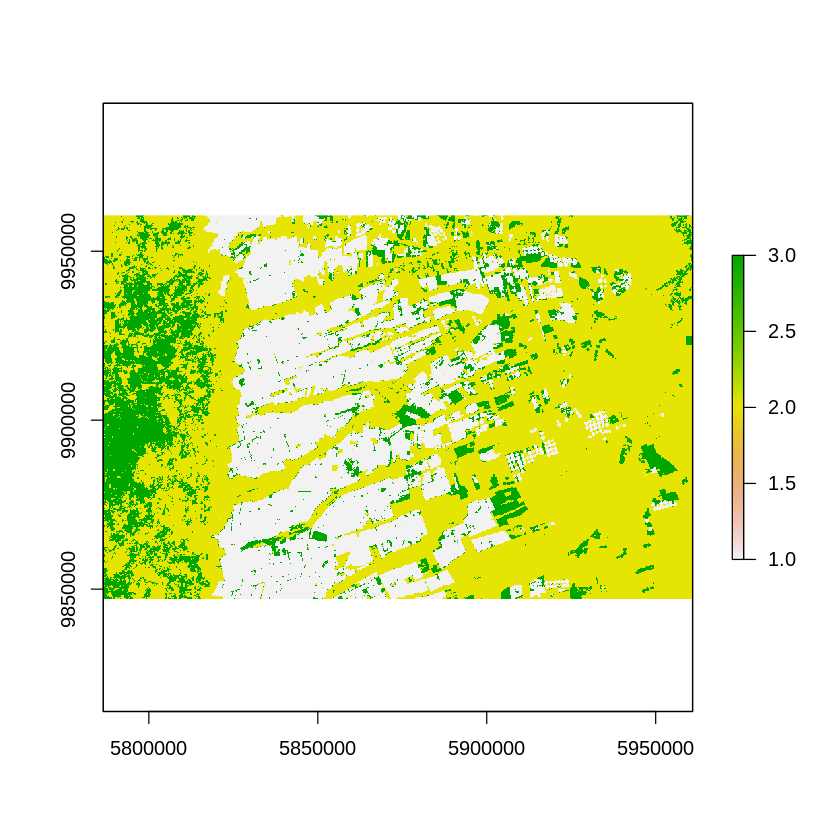

In [11]:
rst <- raster::raster(
    paste0(output_dir, "/cube_to_classify_022024_probs_class_2018_8_2019_7_v1.tif")
)

plot(rst)

## <span style="color: #336699">Save the results</span>
<hr style="border:0.5px solid #0077b9;">

In [12]:
# labels
saveRDS(
    labels, file = paste0(output_dir, "/labels.rds")
)

# probs
saveRDS(
    probs, file = paste0(output_dir, "/probs_cube.rds")
)

# smoothed probs
saveRDS(
    probs_smoothed, file = paste0(output_dir, "/probs_smoothed_cube.rds")
)